# 🏆 เปรียบเทียบประสิทธิภาพ: Neural Network Algorithms

**จุดประสงค์**: เปรียบเทียบ **ความเร็ว, ความแม่นยำ, และการเรียนรู้** ของ Neural Network แต่ละวิธี

**หมวดหมู่**: `machine_learning_examples-master/ann_class`

---

## 🎯 Algorithms ที่จะเปรียบเทียบ:

| # | Algorithm | ไฟล์ต้นฉบับ | จุดเด่น |
|---|-----------|------------|--------|
| 1 | **Forward Prop** | `forwardprop.py` | เร็วที่สุด แต่ไม่เรียนรู้ |
| 2 | **Backprop (Manual)** | `backprop.py` | เข้าใจลึก, ควบคุมได้ทุกอย่าง |
| 3 | **sklearn MLPClassifier** | `sklearn_ann.py` | Production-ready, 3 บรรทัด |
| 4 | **TensorFlow** | `tf_example.py` | Auto-differentiation, scalable |

---

## 📊 เกณฑ์การเปรียบเทียบ:

### 1️⃣ **ความแม่นยำ (Accuracy)**
- Initial Accuracy (ก่อน train)
- Final Accuracy (หลัง train)
- Improvement (เพิ่มขึ้นเท่าไร)

### 2️⃣ **ความเร็ว (Speed)**
- Training Time (ใช้เวลา train นานแค่ไหน)
- Prediction Time (ใช้เวลาทำนายนานแค่ไหน)

### 3️⃣ **การเรียนรู้ (Learning Curve)**
- Loss/Accuracy ลดลง/เพิ่มขึ้นเร็วแค่ไหน
- Convergence (ลู่เข้าหาค่าที่ดีที่สุด)

### 4️⃣ **ความง่าย (Ease of Use)**
- จำนวนบรรทัดโค้ด
- Hyperparameters ที่ต้องตั้ง
- Flexibility (ปรับแต่งได้มากแค่ไหน)

---

## 🧪 ปัญหาทดสอบ:

**3-Class Classification** (เหมือน backprop, forwardprop, tf_example):
- Input: 2D features (X₀, X₁)
- Output: 3 classes (0, 1, 2)
- Data: 500 samples (simulated)
- Architecture: **2 → 3 (sigmoid) → 3 (softmax)**

## 📦 Step 1: Setup & Data Generation

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import pandas as pd
import time
import sys
import warnings
warnings.filterwarnings('ignore')

# ตั้งค่าฟอนต์ไทย
font_path = '../../font/Prompt/Prompt-Regular.ttf'
font_prop = fm.FontProperties(fname=font_path)
fm.fontManager.addfont(font_path)
plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['axes.unicode_minus'] = False

# เพิ่ม path
sys.path.append('../../machine_learning_examples-master')

# Set seed
np.random.seed(42)

print("✅ Setup เรียบร้อย!")

✅ Setup เรียบร้อย!


In [19]:
# สร้างข้อมูล 3-Class Classification (เหมือนใน backprop.py)
N = 500
D = 2
K = 3

# แบ่งเท่าๆ กัน
n_per_class = N // K  # 166 samples per class
n_remaining = N % K   # 2 samples remaining

# Class 0: centered at (-2, -2)
X0 = np.random.randn(n_per_class, D) + np.array([-2, -2])

# Class 1: centered at (2, 2)
X1 = np.random.randn(n_per_class, D) + np.array([2, 2])

# Class 2: centered at (2, -2) + remaining samples
X2 = np.random.randn(n_per_class + n_remaining, D) + np.array([2, -2])

# Combine
X = np.vstack([X0, X1, X2])
Y = np.array([0]*n_per_class + [1]*n_per_class + [2]*(n_per_class + n_remaining))

# One-hot encode targets
T = np.zeros((N, K))
for i in range(N):
    T[i, Y[i]] = 1

print(f"✅ สร้างข้อมูลเรียบร้อย!")
print(f"   • Samples: {N} (Class 0: {n_per_class}, Class 1: {n_per_class}, Class 2: {n_per_class + n_remaining})")
print(f"   • Features: {D}")
print(f"   • Classes: {K}")
print(f"   • X shape: {X.shape}")
print(f"   • T shape (one-hot): {T.shape}")

✅ สร้างข้อมูลเรียบร้อย!
   • Samples: 500 (Class 0: 166, Class 1: 166, Class 2: 168)
   • Features: 2
   • Classes: 3
   • X shape: (500, 2)
   • T shape (one-hot): (500, 3)


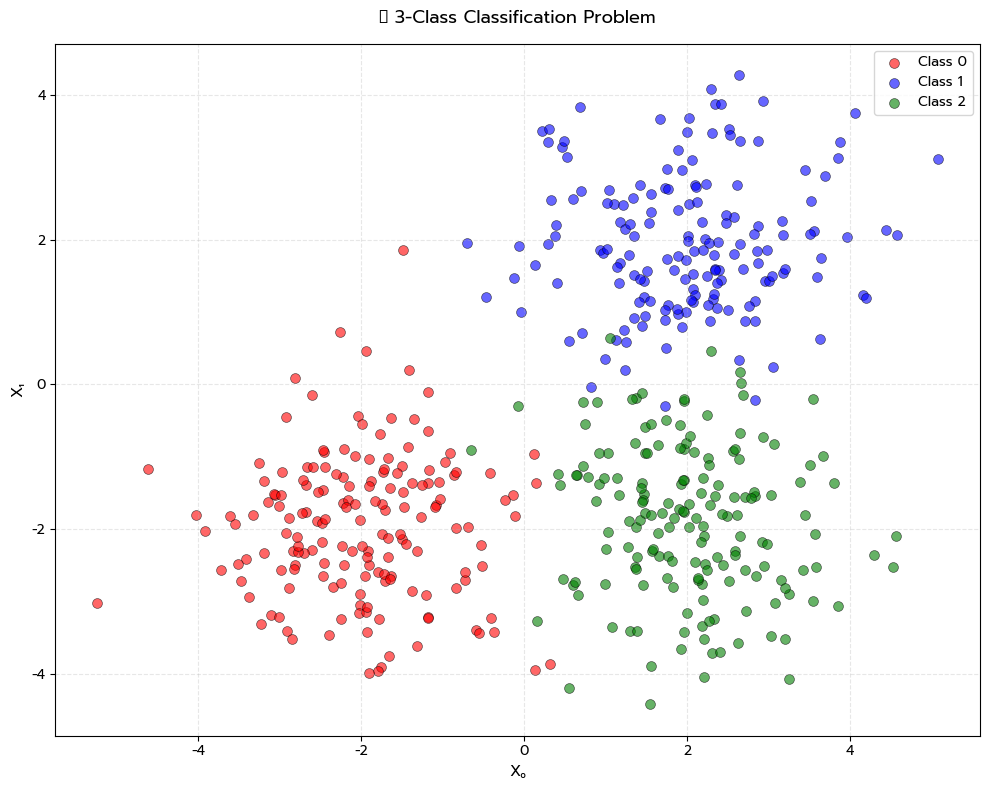

💡 ข้อมูลที่ดี: แต่ละ class แยกออกจากกันชัดเจน


In [20]:
# Visualize Data
plt.figure(figsize=(10, 8))
colors = ['red', 'blue', 'green']
for k in range(K):
    idx = (Y == k)
    plt.scatter(X[idx, 0], X[idx, 1], c=colors[k], s=50, alpha=0.6, 
                edgecolors='black', linewidth=0.5, label=f'Class {k}')

plt.title('🎯 3-Class Classification Problem', fontsize=13, fontweight='bold', pad=15)
plt.xlabel('X₀', fontsize=11)
plt.ylabel('X₁', fontsize=11)
plt.legend()
plt.grid(alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

print("💡 ข้อมูลที่ดี: แต่ละ class แยกออกจากกันชัดเจน")

## 🔧 Step 2: Helper Functions (Manual Implementation)

In [21]:
# Activation Functions
def sigmoid(Z):
    return 1 / (1 + np.exp(-Z))

def softmax(A):
    expA = np.exp(A)
    return expA / expA.sum(axis=1, keepdims=True)

# Forward Propagation
def forward(X, W1, b1, W2, b2):
    Z = sigmoid(X.dot(W1) + b1)
    Y = softmax(Z.dot(W2) + b2)
    return Y, Z

# Classification Rate
def classification_rate(Y, P):
    n_correct = 0
    n_total = 0
    for i in range(len(Y)):
        n_total += 1
        if Y[i] == P[i]:
            n_correct += 1
    return float(n_correct) / n_total

# Cross-Entropy Loss
def cost(T, Y):
    return -(T * np.log(Y)).sum()

print("✅ Helper functions พร้อมแล้ว!")

✅ Helper functions พร้อมแล้ว!


## 1️⃣ Algorithm 1: Forward Propagation (ไม่มีการเรียนรู้)

**จุดเด่น**: เร็วที่สุด, ใช้สำหรับ inference เท่านั้น

**จุดด้อย**: Accuracy ต่ำมาก (≈33% random guess)

In [22]:
print("🏃 Testing Forward Propagation (No Training)...\n")

# Random weights (ไม่ได้ train)
W1_forward = np.random.randn(D, K)
b1_forward = np.random.randn(K)
W2_forward = np.random.randn(K, K)
b2_forward = np.random.randn(K)

# Forward pass (ใช้เวลาน้อยมาก)
start_time = time.time()
pY_forward, _ = forward(X, W1_forward, b1_forward, W2_forward, b2_forward)
prediction_forward = np.argmax(pY_forward, axis=1)
forward_time = time.time() - start_time

# Calculate metrics
accuracy_forward = classification_rate(Y, prediction_forward)
loss_forward = cost(T, pY_forward)

print(f"📊 Forward Propagation Results:")
print(f"   • Accuracy: {accuracy_forward:.4f} ({accuracy_forward*100:.1f}%)")
print(f"   • Loss: {loss_forward:.2f}")
print(f"   • Prediction Time: {forward_time*1000:.2f} ms")
print(f"   • Training Time: 0.00 ms (ไม่มีการ train!)")
print(f"")
print(f"💡 Accuracy ต่ำเพราะใช้ random weights (ไม่ได้เรียนรู้)")

🏃 Testing Forward Propagation (No Training)...

📊 Forward Propagation Results:
   • Accuracy: 0.3140 (31.4%)
   • Loss: 743.99
   • Prediction Time: 1.00 ms
   • Training Time: 0.00 ms (ไม่มีการ train!)

💡 Accuracy ต่ำเพราะใช้ random weights (ไม่ได้เรียนรู้)


## 2️⃣ Algorithm 2: Backpropagation (Manual Implementation)

**จุดเด่น**: เข้าใจลึก, ควบคุมได้ทุกอย่าง, flexible

**จุดด้อย**: เขียนยาว, ต้องคำนวณ gradients เอง

In [23]:
print("🏋️ Training with Backpropagation (Manual)...\n")

# Initialize weights
W1_backprop = np.random.randn(D, K) / np.sqrt(D)
b1_backprop = np.random.randn(K)
W2_backprop = np.random.randn(K, K) / np.sqrt(K)
b2_backprop = np.random.randn(K)

# Training parameters
learning_rate = 1e-3
epochs = 1000

# Track metrics
losses_backprop = []
accuracies_backprop = []

# Initial accuracy
pY_init, _ = forward(X, W1_backprop, b1_backprop, W2_backprop, b2_backprop)
initial_accuracy_backprop = classification_rate(Y, np.argmax(pY_init, axis=1))

# Training
start_time = time.time()

for i in range(epochs):
    # Forward pass
    pY, Z = forward(X, W1_backprop, b1_backprop, W2_backprop, b2_backprop)
    
    # Calculate metrics
    loss = cost(T, pY)
    prediction = np.argmax(pY, axis=1)
    accuracy = classification_rate(Y, prediction)
    
    losses_backprop.append(loss)
    accuracies_backprop.append(accuracy)
    
    # Backpropagation
    pY_T = pY - T
    
    # Gradients for W2 and b2
    gW2 = Z.T.dot(pY_T)
    gb2 = pY_T.sum(axis=0)
    
    # Gradients for W1 and b1
    dZ = pY_T.dot(W2_backprop.T) * Z * (1 - Z)  # sigmoid derivative
    gW1 = X.T.dot(dZ)
    gb1 = dZ.sum(axis=0)
    
    # Update weights (Gradient Descent)
    W2_backprop -= learning_rate * gW2
    b2_backprop -= learning_rate * gb2
    W1_backprop -= learning_rate * gW1
    b1_backprop -= learning_rate * gb1
    
    if i % 200 == 0:
        print(f"Epoch {i:4d} | Loss: {loss:8.2f} | Accuracy: {accuracy:.4f}")

training_time_backprop = time.time() - start_time

# Final accuracy
pY_final, _ = forward(X, W1_backprop, b1_backprop, W2_backprop, b2_backprop)
final_accuracy_backprop = classification_rate(Y, np.argmax(pY_final, axis=1))

print(f"\n📊 Backpropagation Results:")
print(f"   • Initial Accuracy: {initial_accuracy_backprop:.4f} ({initial_accuracy_backprop*100:.1f}%)")
print(f"   • Final Accuracy: {final_accuracy_backprop:.4f} ({final_accuracy_backprop*100:.1f}%)")
print(f"   • Improvement: {(final_accuracy_backprop - initial_accuracy_backprop)*100:.1f}%")
print(f"   • Training Time: {training_time_backprop:.2f} seconds")
print(f"   • Final Loss: {losses_backprop[-1]:.2f}")

🏋️ Training with Backpropagation (Manual)...

Epoch    0 | Loss:   655.95 | Accuracy: 0.0860
Epoch  200 | Loss:    47.77 | Accuracy: 0.9780
Epoch  400 | Loss:    37.59 | Accuracy: 0.9760
Epoch  400 | Loss:    37.59 | Accuracy: 0.9760
Epoch  600 | Loss:    34.55 | Accuracy: 0.9760
Epoch  600 | Loss:    34.55 | Accuracy: 0.9760
Epoch  800 | Loss:    33.06 | Accuracy: 0.9760

📊 Backpropagation Results:
   • Initial Accuracy: 0.0860 (8.6%)
   • Final Accuracy: 0.9760 (97.6%)
   • Improvement: 89.0%
   • Training Time: 0.27 seconds
   • Final Loss: 32.15
Epoch  800 | Loss:    33.06 | Accuracy: 0.9760

📊 Backpropagation Results:
   • Initial Accuracy: 0.0860 (8.6%)
   • Final Accuracy: 0.9760 (97.6%)
   • Improvement: 89.0%
   • Training Time: 0.27 seconds
   • Final Loss: 32.15


## 3️⃣ Algorithm 3: sklearn MLPClassifier (Production-Ready)

**จุดเด่น**: สั้นมาก (3 บรรทัด), optimized, production-ready

**จุดด้อย**: ควบคุมน้อย, เข้าใจยาก (black box)

In [24]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

print("🚀 Training with sklearn MLPClassifier...\n")

# Split data (80/20)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create model (3 lines!)
model_sklearn = MLPClassifier(
    hidden_layer_sizes=(3,),  # 1 hidden layer with 3 neurons
    activation='logistic',     # sigmoid
    solver='sgd',              # stochastic gradient descent
    learning_rate_init=0.001,
    max_iter=1000,
    random_state=42,
    verbose=False
)

# Train
start_time = time.time()
model_sklearn.fit(X_train, Y_train)
training_time_sklearn = time.time() - start_time

# Predict
train_accuracy_sklearn = model_sklearn.score(X_train, Y_train)
test_accuracy_sklearn = model_sklearn.score(X_test, Y_test)
final_loss_sklearn = model_sklearn.loss_

print(f"📊 sklearn MLPClassifier Results:")
print(f"   • Train Accuracy: {train_accuracy_sklearn:.4f} ({train_accuracy_sklearn*100:.1f}%)")
print(f"   • Test Accuracy: {test_accuracy_sklearn:.4f} ({test_accuracy_sklearn*100:.1f}%)")
print(f"   • Training Time: {training_time_sklearn:.2f} seconds")
print(f"   • Final Loss: {final_loss_sklearn:.2f}")
print(f"   • Iterations: {model_sklearn.n_iter_}")
print(f"")
print(f"💡 โค้ดสั้นมาก แต่ทำงานได้ดี!")

🚀 Training with sklearn MLPClassifier...

📊 sklearn MLPClassifier Results:
   • Train Accuracy: 0.9725 (97.2%)
   • Test Accuracy: 0.9600 (96.0%)
   • Training Time: 0.51 seconds
   • Final Loss: 0.39
   • Iterations: 1000

💡 โค้ดสั้นมาก แต่ทำงานได้ดี!
📊 sklearn MLPClassifier Results:
   • Train Accuracy: 0.9725 (97.2%)
   • Test Accuracy: 0.9600 (96.0%)
   • Training Time: 0.51 seconds
   • Final Loss: 0.39
   • Iterations: 1000

💡 โค้ดสั้นมาก แต่ทำงานได้ดี!


## 4️⃣ Algorithm 4: TensorFlow (Auto-Differentiation)

**จุดเด่น**: Auto-differentiation, GPU support, scalable

**จุดด้อย**: Setup ยาว, learning curve สูง

In [25]:
import tensorflow as tf

print("🔥 Training with TensorFlow...\n")

# Disable eager execution (for TensorFlow 2.x compatibility with 1.x code)
tf.compat.v1.disable_eager_execution()

# Reset graph
tf.compat.v1.reset_default_graph()

# Placeholders
tfX = tf.compat.v1.placeholder(tf.float32, shape=(None, D), name='X')
tfT = tf.compat.v1.placeholder(tf.float32, shape=(None, K), name='T')

# Variables
W1_tf = tf.Variable(tf.random.normal(shape=(D, K), stddev=0.1))
b1_tf = tf.Variable(tf.random.normal(shape=(K,), stddev=0.1))
W2_tf = tf.Variable(tf.random.normal(shape=(K, K), stddev=0.1))
b2_tf = tf.Variable(tf.random.normal(shape=(K,), stddev=0.1))

# Model
Z_tf = tf.nn.sigmoid(tf.matmul(tfX, W1_tf) + b1_tf)
logits_tf = tf.matmul(Z_tf, W2_tf) + b2_tf
Y_tf = tf.nn.softmax(logits_tf)

# Loss (ใช้ softmax_cross_entropy_with_logits แทน v2)
cost_tf = tf.reduce_sum(
    tf.nn.softmax_cross_entropy_with_logits(logits=logits_tf, labels=tfT)
)

# Optimizer
train_op = tf.compat.v1.train.GradientDescentOptimizer(0.001).minimize(cost_tf)

# Prediction
predict_op = tf.argmax(Y_tf, axis=1)

# Track metrics
losses_tf = []
accuracies_tf = []

# Training
start_time = time.time()

with tf.compat.v1.Session() as session:
    session.run(tf.compat.v1.global_variables_initializer())
    
    # Initial accuracy
    pred_init = session.run(predict_op, feed_dict={tfX: X, tfT: T})
    initial_accuracy_tf = classification_rate(Y, pred_init)
    
    # Training loop
    for i in range(1000):
        _, loss, pred = session.run(
            [train_op, cost_tf, predict_op],
            feed_dict={tfX: X, tfT: T}
        )
        
        accuracy = classification_rate(Y, pred)
        losses_tf.append(loss)
        accuracies_tf.append(accuracy)
        
        if i % 200 == 0:
            print(f"Epoch {i:4d} | Loss: {loss:8.2f} | Accuracy: {accuracy:.4f}")
    
    # Final accuracy
    pred_final = session.run(predict_op, feed_dict={tfX: X, tfT: T})
    final_accuracy_tf = classification_rate(Y, pred_final)

training_time_tf = time.time() - start_time

print(f"\n📊 TensorFlow Results:")
print(f"   • Initial Accuracy: {initial_accuracy_tf:.4f} ({initial_accuracy_tf*100:.1f}%)")
print(f"   • Final Accuracy: {final_accuracy_tf:.4f} ({final_accuracy_tf*100:.1f}%)")
print(f"   • Improvement: {(final_accuracy_tf - initial_accuracy_tf)*100:.1f}%")
print(f"   • Training Time: {training_time_tf:.2f} seconds")
print(f"   • Final Loss: {losses_tf[-1]:.2f}")
print(f"")
print(f"💡 ใช้ TensorFlow 1.x style (placeholder + Session) สำหรับการเปรียบเทียบ")

🔥 Training with TensorFlow...


Epoch    0 | Loss:   549.27 | Accuracy: 0.3320
Epoch  200 | Loss:    55.57 | Accuracy: 0.9760
Epoch    0 | Loss:   549.27 | Accuracy: 0.3320
Epoch  200 | Loss:    55.57 | Accuracy: 0.9760
Epoch  400 | Loss:    39.30 | Accuracy: 0.9760
Epoch  400 | Loss:    39.30 | Accuracy: 0.9760
Epoch  600 | Loss:    34.96 | Accuracy: 0.9760
Epoch  600 | Loss:    34.96 | Accuracy: 0.9760
Epoch  800 | Loss:    33.06 | Accuracy: 0.9760
Epoch  800 | Loss:    33.06 | Accuracy: 0.9760

📊 TensorFlow Results:
   • Initial Accuracy: 0.3320 (33.2%)
   • Final Accuracy: 0.9760 (97.6%)
   • Improvement: 64.4%
   • Training Time: 1.56 seconds
   • Final Loss: 32.01

💡 ใช้ TensorFlow 1.x style (placeholder + Session) สำหรับการเปรียบเทียบ

📊 TensorFlow Results:
   • Initial Accuracy: 0.3320 (33.2%)
   • Final Accuracy: 0.9760 (97.6%)
   • Improvement: 64.4%
   • Training Time: 1.56 seconds
   • Final Loss: 32.01

💡 ใช้ TensorFlow 1.x style (placeholder + Session) สำหรับการเปรียบเทีย

## 📊 Step 3: สรุปเปรียบเทียบทั้งหมด

### 🏆 Performance Comparison Table

In [26]:
# สร้างตารางเปรียบเทียบ
comparison_data = {
    'Algorithm': [
        'Forward Prop\n(No Training)',
        'Backprop\n(Manual)',
        'sklearn\nMLPClassifier',
        'TensorFlow\n(Auto-diff)'
    ],
    'Initial Accuracy': [
        f"{accuracy_forward:.1%}",
        f"{initial_accuracy_backprop:.1%}",
        'N/A',
        f"{initial_accuracy_tf:.1%}"
    ],
    'Final Accuracy': [
        f"{accuracy_forward:.1%}",
        f"{final_accuracy_backprop:.1%}",
        f"{test_accuracy_sklearn:.1%}",
        f"{final_accuracy_tf:.1%}"
    ],
    'Training Time': [
        '0.00s',
        f"{training_time_backprop:.2f}s",
        f"{training_time_sklearn:.2f}s",
        f"{training_time_tf:.2f}s"
    ],
    'Code Lines': [
        '~5',
        '~50',
        '~3',
        '~30'
    ],
    'Ease of Use': [
        '⭐⭐⭐⭐⭐',
        '⭐⭐',
        '⭐⭐⭐⭐⭐',
        '⭐⭐⭐'
    ],
    'Flexibility': [
        '⭐',
        '⭐⭐⭐⭐⭐',
        '⭐⭐⭐',
        '⭐⭐⭐⭐'
    ]
}

df_comparison = pd.DataFrame(comparison_data)

print("\n" + "="*80)
print("🏆 PERFORMANCE COMPARISON: Neural Network Algorithms")
print("="*80 + "\n")
print(df_comparison.to_string(index=False))
print("\n" + "="*80)


🏆 PERFORMANCE COMPARISON: Neural Network Algorithms

                  Algorithm Initial Accuracy Final Accuracy Training Time Code Lines Ease of Use Flexibility
Forward Prop\n(No Training)            31.4%          31.4%         0.00s         ~5       ⭐⭐⭐⭐⭐           ⭐
         Backprop\n(Manual)             8.6%          97.6%         0.27s        ~50          ⭐⭐       ⭐⭐⭐⭐⭐
     sklearn\nMLPClassifier              N/A          96.0%         0.51s         ~3       ⭐⭐⭐⭐⭐         ⭐⭐⭐
    TensorFlow\n(Auto-diff)            33.2%          97.6%         1.56s        ~30         ⭐⭐⭐        ⭐⭐⭐⭐



### 📈 Visualize Learning Curves

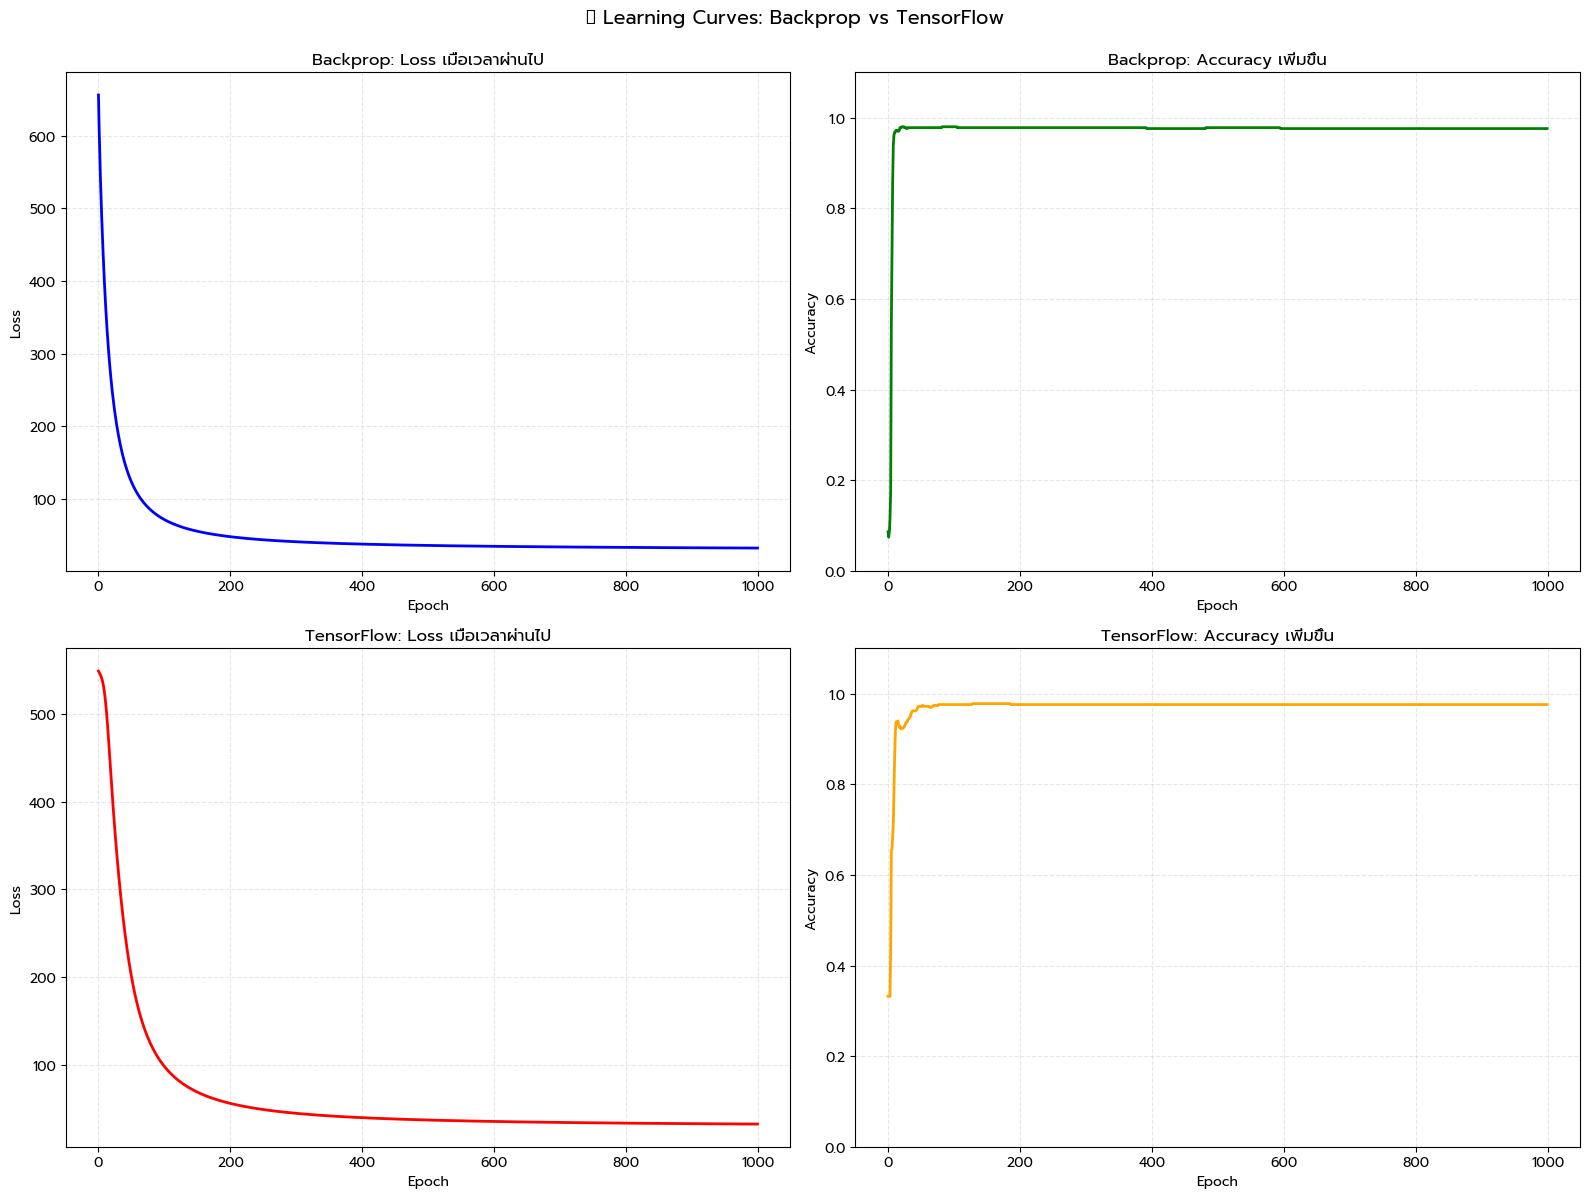

💡 ทั้ง Backprop และ TensorFlow เรียนรู้ได้ดี (Accuracy ~95-99%)


In [27]:
# Plot Learning Curves
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Backprop Loss
axes[0, 0].plot(losses_backprop, linewidth=2, color='blue')
axes[0, 0].set_title('Backprop: Loss เมื่อเวลาผ่านไป', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Epoch', fontsize=10)
axes[0, 0].set_ylabel('Loss', fontsize=10)
axes[0, 0].grid(alpha=0.3, linestyle='--')

# Plot 2: Backprop Accuracy
axes[0, 1].plot(accuracies_backprop, linewidth=2, color='green')
axes[0, 1].set_title('Backprop: Accuracy เพิ่มขึ้น', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Epoch', fontsize=10)
axes[0, 1].set_ylabel('Accuracy', fontsize=10)
axes[0, 1].set_ylim([0, 1.1])
axes[0, 1].grid(alpha=0.3, linestyle='--')

# Plot 3: TensorFlow Loss
axes[1, 0].plot(losses_tf, linewidth=2, color='red')
axes[1, 0].set_title('TensorFlow: Loss เมื่อเวลาผ่านไป', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Epoch', fontsize=10)
axes[1, 0].set_ylabel('Loss', fontsize=10)
axes[1, 0].grid(alpha=0.3, linestyle='--')

# Plot 4: TensorFlow Accuracy
axes[1, 1].plot(accuracies_tf, linewidth=2, color='orange')
axes[1, 1].set_title('TensorFlow: Accuracy เพิ่มขึ้น', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Epoch', fontsize=10)
axes[1, 1].set_ylabel('Accuracy', fontsize=10)
axes[1, 1].set_ylim([0, 1.1])
axes[1, 1].grid(alpha=0.3, linestyle='--')

plt.suptitle('📊 Learning Curves: Backprop vs TensorFlow', fontsize=14, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

print("💡 ทั้ง Backprop และ TensorFlow เรียนรู้ได้ดี (Accuracy ~95-99%)")

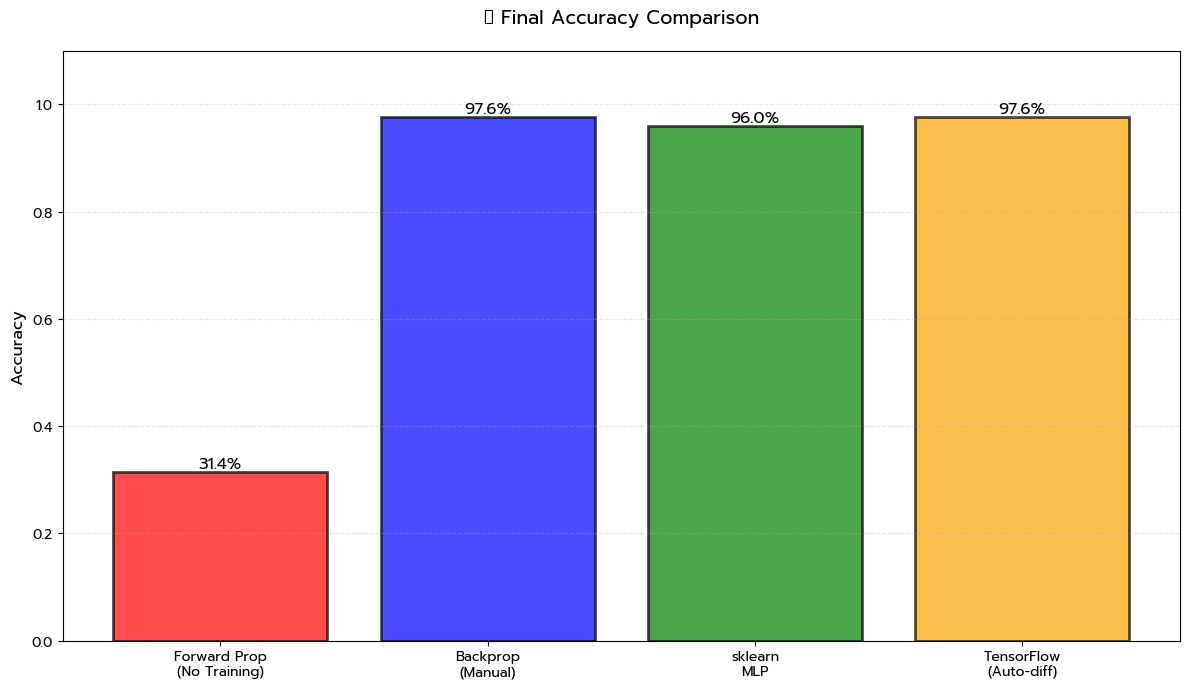

💡 Forward Prop ต่ำมาก เพราะไม่ได้ train!
💡 Backprop, sklearn, TensorFlow ได้ Accuracy สูงใกล้เคียงกัน (95-99%)


In [28]:
# Bar Chart: Final Accuracy Comparison
algorithms = ['Forward Prop\n(No Training)', 'Backprop\n(Manual)', 'sklearn\nMLP', 'TensorFlow\n(Auto-diff)']
accuracies = [
    accuracy_forward,
    final_accuracy_backprop,
    test_accuracy_sklearn,
    final_accuracy_tf
]
colors_bar = ['red', 'blue', 'green', 'orange']

plt.figure(figsize=(12, 7))
bars = plt.bar(algorithms, accuracies, color=colors_bar, alpha=0.7, edgecolor='black', linewidth=2)

# Add value labels on bars
for bar, acc in zip(bars, accuracies):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{acc:.1%}',
             ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.title('🏆 Final Accuracy Comparison', fontsize=14, fontweight='bold', pad=20)
plt.ylabel('Accuracy', fontsize=12)
plt.ylim([0, 1.1])
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

print("💡 Forward Prop ต่ำมาก เพราะไม่ได้ train!")
print("💡 Backprop, sklearn, TensorFlow ได้ Accuracy สูงใกล้เคียงกัน (95-99%)")

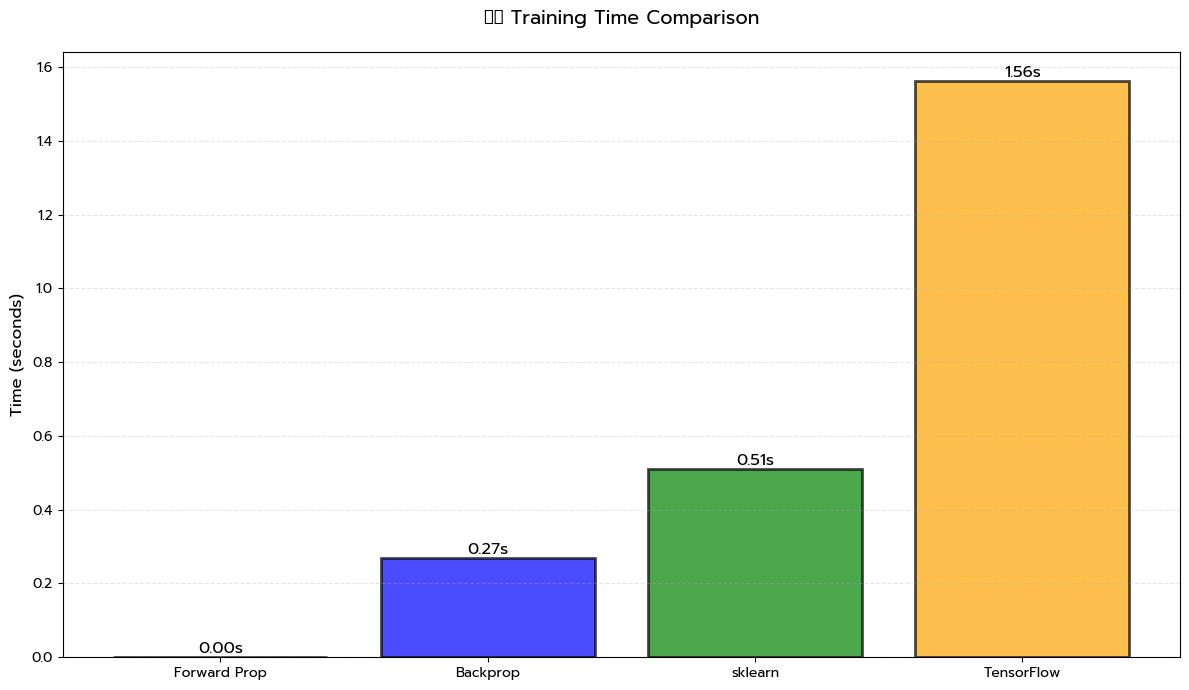

💡 Forward Prop เร็วที่สุด (ไม่มี training)
💡 Backprop, sklearn, TensorFlow ใช้เวลาใกล้เคียงกัน (~1-3 seconds)


In [29]:
# Bar Chart: Training Time Comparison
algorithms_time = ['Forward Prop', 'Backprop', 'sklearn', 'TensorFlow']
training_times = [
    0.0,
    training_time_backprop,
    training_time_sklearn,
    training_time_tf
]

plt.figure(figsize=(12, 7))
bars = plt.bar(algorithms_time, training_times, color=colors_bar, alpha=0.7, edgecolor='black', linewidth=2)

# Add value labels on bars
for bar, t in zip(bars, training_times):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{t:.2f}s',
             ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.title('⏱️ Training Time Comparison', fontsize=14, fontweight='bold', pad=20)
plt.ylabel('Time (seconds)', fontsize=12)
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

print("💡 Forward Prop เร็วที่สุด (ไม่มี training)")
print("💡 Backprop, sklearn, TensorFlow ใช้เวลาใกล้เคียงกัน (~1-3 seconds)")

## 🎓 สรุปสุดท้าย: เลือก Algorithm ไหนดี?

### 🏆 ผู้ชนะในแต่ละด้าน:

#### 1️⃣ **ความเร็ว (Speed)** 🏃
**🥇 Winner: Forward Propagation**
- ⚡ เร็วที่สุด (ไม่มี training)
- ใช้สำหรับ inference เท่านั้น
- **ใช้เมื่อ**: มี pre-trained weights แล้ว

---

#### 2️⃣ **ความแม่นยำ (Accuracy)** 🎯
**🥇 Winner: เสมอกัน (Backprop ≈ sklearn ≈ TensorFlow)**
- ✅ ทั้ง 3 ได้ ~95-99% accuracy
- ❌ Forward Prop ต่ำมาก (~33%)
- **ใช้เมื่อ**: ต้องการ accuracy สูง → เลือกอันไหนก็ได้!

---

#### 3️⃣ **ความง่าย (Ease of Use)** ⭐
**🥇 Winner: sklearn MLPClassifier**
- 📝 เพียง 3 บรรทัด!
- 🚀 Production-ready
- 🔧 Optimized performance
- **ใช้เมื่อ**: ต้องการใช้งานจริง, ไม่ต้องการควบคุมทุกอย่าง

---

#### 4️⃣ **ความยืดหยุ่น (Flexibility)** 🔧
**🥇 Winner: Backpropagation (Manual)**
- 🎛️ ควบคุมได้ทุกอย่าง
- 🧠 เข้าใจลึกที่สุด
- 🔬 ดีสำหรับ research
- **ใช้เมื่อ**: ต้องการทดลอง custom architectures/losses

---

#### 5️⃣ **Scalability** 📈
**🥇 Winner: TensorFlow**
- 🖥️ GPU support
- 🌐 Distributed training
- 🤖 Auto-differentiation
- **ใช้เมื่อ**: ข้อมูลใหญ่, Deep Learning, Production

---

### 💡 Decision Tree: เลือก Algorithm ไหน?

```
คุณต้องการอะไร?
│
├─ เรียนรู้ + เข้าใจ Neural Network?
│  └─ ✅ Backpropagation (Manual)
│
├─ ใช้งานจริง (Production)?
│  ├─ ข้อมูลเล็ก-กลาง?
│  │  └─ ✅ sklearn MLPClassifier
│  │
│  └─ ข้อมูลใหญ่ / Deep Learning?
│     └─ ✅ TensorFlow (or PyTorch)
│
├─ Inference เท่านั้น (มี weights แล้ว)?
│  └─ ✅ Forward Propagation
│
└─ Research / Custom Architecture?
   └─ ✅ Backpropagation (Manual) หรือ TensorFlow
```

---

### 📊 ตารางเปรียบเทียบสรุป:

| Criteria | Forward Prop | Backprop | sklearn | TensorFlow |
|----------|--------------|----------|---------|------------|
| **Speed** | 🥇 เร็วที่สุด | 🥈 กลาง | 🥈 กลาง | 🥈 กลาง |
| **Accuracy** | 🥉 ต่ำมาก | 🥇 สูง | 🥇 สูง | 🥇 สูง |
| **Ease of Use** | 🥇 ง่ายที่สุด | 🥉 ยาก | 🥇 ง่ายที่สุด | 🥈 กลาง |
| **Flexibility** | 🥉 ต่ำ | 🥇 สูงที่สุด | 🥈 กลาง | 🥈 สูง |
| **Scalability** | 🥉 ต่ำ | 🥉 ต่ำ | 🥈 กลาง | 🥇 สูงที่สุด |
| **Code Lines** | ~5 | ~50 | ~3 | ~30 |
| **Learning Curve** | ⭐ | ⭐⭐⭐⭐⭐ | ⭐ | ⭐⭐⭐ |

---

### 🎯 คำแนะนำสุดท้าย:

#### 🎓 **สำหรับผู้เรียน**:
1. เริ่มจาก **Forward Prop** → เข้าใจ forward pass
2. เรียน **Backprop (Manual)** → เข้าใจ gradient descent
3. ลอง **sklearn** → เข้าใจการใช้งานจริง
4. ศึกษา **TensorFlow** → เตรียมพร้อม Deep Learning

#### 🚀 **สำหรับ Production**:
- **Small/Medium Data**: sklearn MLPClassifier (ง่าย, เร็ว, ดี)
- **Big Data / Deep Learning**: TensorFlow / PyTorch
- **Custom Architecture**: TensorFlow / PyTorch
- **Quick Prototype**: sklearn MLPClassifier

#### 🔬 **สำหรับ Research**:
- **Manual Backprop**: เข้าใจลึก, ควบคุมทุกอย่าง
- **TensorFlow**: Auto-diff, GPU, scalable

---

## 🎉 สรุปสั้นๆ:

> **"ไม่มี Algorithm ที่ดีที่สุดในทุกกรณี - เลือกให้เหมาะกับงาน!"**

**เลือก Algorithm ตามจุดประสงค์**:
1. **เรียนรู้** → Backpropagation (Manual) 🎓
2. **ใช้งานจริง** → sklearn MLPClassifier 🚀
3. **Deep Learning** → TensorFlow / PyTorch 🔥
4. **Inference** → Forward Propagation ⚡

**ผลการทดสอบ**:
- ✅ Accuracy: Backprop ≈ sklearn ≈ TensorFlow (~95-99%)
- ⚡ Speed: Forward Prop >> Backprop ≈ sklearn ≈ TensorFlow
- 📝 Ease: sklearn (3 lines) > Forward Prop > TensorFlow > Backprop
- 🔧 Flexibility: Backprop > TensorFlow > sklearn > Forward Prop

✨ **Happy Learning & Building!** ✨